In [1]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('api_data_aadhar_demographic_0_500000.csv')
df2 = pd.read_csv('api_data_aadhar_demographic_500000_1000000.csv') 
df3 = pd.read_csv('api_data_aadhar_demographic_1000000_1500000.csv') 
df4 = pd.read_csv('api_data_aadhar_demographic_1500000_2000000.csv') 
df5 = pd.read_csv('api_data_aadhar_demographic_2000000_2071700.csv')

In [3]:
demo_data = pd.concat([df1, df2, df3, df4, df5], axis = 0 )
demo_data

,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,01-03-2025,Uttar Pradesh,Gorakhpur,273213,49,529
1,01-03-2025,Andhra Pradesh,Chittoor,517132,22,375
2,01-03-2025,Gujarat,Rajkot,360006,65,765
3,01-03-2025,Andhra Pradesh,Srikakulam,532484,24,314
4,01-03-2025,Rajasthan,Udaipur,313801,45,785
...,...,...,...,...,...,...
71695,29-12-2025,West Bengal,West Midnapore,721212,0,12
71696,29-12-2025,West Bengal,West Midnapore,721420,0,1
71697,29-12-2025,West Bengal,West Midnapore,721424,0,5
71698,29-12-2025,West Bengal,West Midnapore,721426,0,3


In [4]:
demo_data.shape

(2071700, 6)

In [5]:
demo_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2071700 entries, 0 to 71699
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   date           object
 1   state          object
 2   district       object
 3   pincode        int64 
 4   demo_age_5_17  int64 
 5   demo_age_17_   int64 
dtypes: int64(3), object(3)
memory usage: 110.6+ MB


In [6]:
demo_data.rename(columns = {'demo_age_5_17':'minor', 'demo_age_17_':'adult'}, inplace= True)

In [7]:
demo_data.describe()

,pincode,minor,adult
count,2.071700e+06,2.071700e+06,2.071700e+06
mean,5.278318e+05,2.347552e+00,2.144701e+01
std,1.972933e+05,1.490355e+01,1.252498e+02
min,1.000000e+05,0.000000e+00,0.000000e+00
25%,3.964690e+05,0.000000e+00,2.000000e+00
50%,5.243220e+05,1.000000e+00,6.000000e+00
75%,6.955070e+05,2.000000e+00,1.500000e+01
max,8.554560e+05,2.690000e+03,1.616600e+04


In [8]:
demo_data[demo_data['minor']==2.690000e+03]

,date,state,district,pincode,minor,adult
414597,01-04-2025,Delhi,North East Delhi,110094,2690,9668
242069,01-04-2025,Delhi,North East Delhi,110094,2690,9668


In [9]:
demo_data[demo_data['adult']==1.616600e+04]

,date,state,district,pincode,minor,adult
332090,01-06-2025,Chhattisgarh,Kondagaon,494226,776,16166
159562,01-06-2025,Chhattisgarh,Kondagaon,494226,776,16166


# data cleaning 
removing duplicates and making states column consistent

In [10]:
# Count exact duplicate rows
demo_data.duplicated().sum()

473601

In [11]:
len(demo_data)

2071700

In [12]:
2071700- 473601

1598099

In [13]:
demo_data[demo_data.duplicated()].head()

,date,state,district,pincode,minor,adult
227394,26-10-2025,Tamil Nadu,Krishnagiri,635207,6,17
227395,26-10-2025,Tamil Nadu,Krishnagiri,635306,6,3
227396,26-10-2025,Tamil Nadu,Krishnagiri,635307,5,17
227397,26-10-2025,Tamil Nadu,Krishnagiri,635654,1,1
227398,26-10-2025,Tamil Nadu,Krishnagiri,636806,1,3


In [14]:
demo_data[demo_data.duplicated()].tail()

,date,state,district,pincode,minor,adult
69815,29-12-2025,Andhra Pradesh,Cuddapah,516004,0,4
69816,29-12-2025,Andhra Pradesh,Cuddapah,516151,0,1
69817,29-12-2025,Andhra Pradesh,Cuddapah,516173,0,4
69818,29-12-2025,Andhra Pradesh,Cuddapah,516175,1,2
69819,29-12-2025,Andhra Pradesh,Cuddapah,516218,0,3


In [15]:
#26-10-2025	Tamil Nadu	Krishnagiri	635207	6	17
demo_data[
    (demo_data['date'] == '26-10-2025') &
    (demo_data['state'] == 'Tamil Nadu') &
    (demo_data['district'] == 'Krishnagiri') &
    (demo_data['pincode'] == 635207) &
    (demo_data['minor'] == 6) &
    (demo_data['adult'] == 17)
]


,date,state,district,pincode,minor,adult
118681,26-10-2025,Tamil Nadu,Krishnagiri,635207,6,17
227394,26-10-2025,Tamil Nadu,Krishnagiri,635207,6,17


In [16]:
#29-12-2025	Andhra Pradesh	Cuddapah	516175	1	2
demo_data[
    (demo_data['date'] == '29-12-2025') &
    (demo_data['state'] == 'Andhra Pradesh') &
    (demo_data['district'] == 'Cuddapah') &
    (demo_data['pincode'] == 516175) &
    (demo_data['minor'] == 1) &
    (demo_data['adult'] == 2)
]


,date,state,district,pincode,minor,adult
282890,29-12-2025,Andhra Pradesh,Cuddapah,516175,1,2
69818,29-12-2025,Andhra Pradesh,Cuddapah,516175,1,2


In [17]:
# repmove duplicates 
demo_data  = demo_data.drop_duplicates()

In [18]:
a = demo_data.duplicated().any()
print(a)

False


the duplicates are now removed 

In [19]:
demo_data.shape

(1598099, 6)

number of rows decreased by removing duplicates 

In [20]:
demo_data['state'].nunique()

65

In [21]:
# keep relevant features only 
demo_data = demo_data[['date','state','minor', 'adult']]
demo_data.shape

(1598099, 4)

In [22]:
demo_data.head()

,date,state,minor,adult
0,01-03-2025,Uttar Pradesh,49,529
1,01-03-2025,Andhra Pradesh,22,375
2,01-03-2025,Gujarat,65,765
3,01-03-2025,Andhra Pradesh,24,314
4,01-03-2025,Rajasthan,45,785


In [23]:
demo_data.describe()

,minor,adult
count,1.598099e+06,1.598099e+06
mean,2.251260e+00,2.064942e+01
std,1.391927e+01,1.177073e+02
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,2.000000e+00
50%,1.000000e+00,6.000000e+00
75%,2.000000e+00,1.500000e+01
max,2.690000e+03,1.616600e+04


In [24]:
# state with max demo updates by minor  
demo_data[demo_data['minor'] ==2.690000e+03]

,date,state,minor,adult
414597,01-04-2025,Delhi,2690,9668


In [25]:
# state with ax demo updates by adults
demo_data[demo_data['adult'] ==1.616600e+04]

,date,state,minor,adult
332090,01-06-2025,Chhattisgarh,776,16166


In [26]:
demo_data['state'].nunique()

65

In [27]:
# data cleaning -> making the states column consistent and accurate 
demo_data[demo_data['state'].str.isnumeric() ]

,date,state,minor,adult
295161,23-12-2025,100000,0,1
7370,20-12-2025,100000,0,1


In [28]:
demo_data = demo_data[demo_data['state'] != '100000']
demo_data.shape

(1598097, 4)

In [29]:
demo_data[demo_data['state'].str.isnumeric()].shape[0]

0

In [30]:
sorted(demo_data['state'].unique())

['Andaman & Nicobar Islands',
 'Andaman and Nicobar Islands',
 'Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'BALANAGAR',
 'Bihar',
 'Chandigarh',
 'Chhatisgarh',
 'Chhattisgarh',
 'Dadra & Nagar Haveli',
 'Dadra and Nagar Haveli',
 'Dadra and Nagar Haveli and Daman and Diu',
 'Daman & Diu',
 'Daman and Diu',
 'Darbhanga',
 'Delhi',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jaipur',
 'Jammu & Kashmir',
 'Jammu and Kashmir',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Ladakh',
 'Lakshadweep',
 'Madanapalle',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Nagpur',
 'ODISHA',
 'Odisha',
 'Orissa',
 'Pondicherry',
 'Puducherry',
 'Punjab',
 'Puttenahalli',
 'Raja Annamalai Puram',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Telangana',
 'Tripura',
 'Uttar Pradesh',
 'Uttarakhand',
 'Uttaranchal',
 'WEST BENGAL',
 'WESTBENGAL',
 'West  Bengal',
 'West Bangal',
 'West Bengal',
 'West Bengli',
 'West bengal',
 'Westbengal',
 'andhra prades

In [31]:
demo_data['state'] = demo_data['state'].str.replace('&' , 'and') # replace & with and 

In [32]:
demo_data['state'] = demo_data['state'].str.title() # convert text -> title case 

In [33]:
demo_data['state'] = demo_data['state'].str.replace(r'\s+', ' ', regex=True)

In [34]:
demo_data['state'].nunique()

52

In [35]:
state_dict = {

    # Andaman & Nicobar
    'Andaman And Nicobar Islands': 'Andaman and Nicobar Islands',
    'Andaman and Nicobar Islands': 'Andaman and Nicobar Islands',

    # Andhra Pradesh
    'Balanagar': 'Telangana',
    'Madanapalle': 'Andhra Pradesh',

    # Bihar
    'Darbhanga': 'Bihar',
    
    # Chhattisgarh
    'Chhatisgarh': 'Chhattisgarh',

    # Dadra & Daman (merged UT)
    'Dadra And Nagar Haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'Daman And Diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'The Dadra And Nagar Haveli And Daman And Diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'Dadra And Nagar Haveli And Daman And Diu': 'Dadra and Nagar Haveli and Daman and Diu',
   
    # Jammu & Kashmir
    'Jammu And Kashmir': 'Jammu and Kashmir',

    # Maharashtra
    'Nagpur': 'Maharashtra',


    # Odisha
    'Orissa': 'Odisha',

    # Puducherry
    'Pondicherry': 'Puducherry',


    # Rajasthan
    'Jaipur': 'Rajasthan',

    # Tamil Nadu
    'Tamilnadu': 'Tamil Nadu',
    'Raja Annamalai Puram': 'Tamil Nadu',
    'Puttenahalli': 'Tamil Nadu',

    # Uttarakhand
    'Uttaranchal': 'Uttarakhand',

    # West Bengal
    'West  Bengal': 'West Bengal',
    'West Bangal': 'West Bengal',
    'Westbengal': 'West Bengal',
    'West Bengli': 'West Bengal'
}


In [36]:
demo_data['state'] = demo_data['state'].replace(state_dict)

In [37]:
demo_data['state'].nunique()

36

In [38]:
sorted(demo_data['state'].unique())

['Andaman and Nicobar Islands',
 'Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Chandigarh',
 'Chhattisgarh',
 'Dadra and Nagar Haveli and Daman and Diu',
 'Delhi',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jammu and Kashmir',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Ladakh',
 'Lakshadweep',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Odisha',
 'Puducherry',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Telangana',
 'Tripura',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal']

In [39]:
demo_data.shape

(1598097, 4)

In [40]:
demo_data['date'].unique()

array(['01-03-2025', '01-04-2025', '01-05-2025', '01-06-2025',
       '01-07-2025', '01-09-2025', '02-09-2025', '03-09-2025',
       '04-09-2025', '06-09-2025', '05-09-2025', '07-09-2025',
       '08-09-2025', '09-09-2025', '10-09-2025', '11-09-2025',
       '12-09-2025', '13-09-2025', '14-09-2025', '15-09-2025',
       '16-09-2025', '17-09-2025', '19-09-2025', '18-09-2025',
       '20-09-2025', '13-10-2025', '15-10-2025', '16-10-2025',
       '17-10-2025', '18-10-2025', '26-10-2025', '14-11-2025',
       '13-11-2025', '15-11-2025', '21-10-2025', '20-10-2025',
       '24-10-2025', '23-10-2025', '22-10-2025', '25-10-2025',
       '18-11-2025', '17-11-2025', '19-11-2025', '01-12-2025',
       '27-10-2025', '28-10-2025', '29-10-2025', '30-10-2025',
       '03-12-2025', '02-12-2025', '04-12-2025', '05-12-2025',
       '31-10-2025', '01-11-2025', '02-11-2025', '03-11-2025',
       '06-12-2025', '07-12-2025', '08-12-2025', '09-12-2025',
       '05-11-2025', '04-11-2025', '06-11-2025', '07-11

# feature engineering

In [41]:
# create a new column as total 
demo_data.columns

Index(['date', 'state', 'minor', 'adult'], dtype='object')

In [42]:
demo_data['total'] = demo_data['minor'] + demo_data['adult']
demo_data.columns

Index(['date', 'state', 'minor', 'adult', 'total'], dtype='object')

In [43]:
demo_data.head()

,date,state,minor,adult,total
0,01-03-2025,Uttar Pradesh,49,529,578
1,01-03-2025,Andhra Pradesh,22,375,397
2,01-03-2025,Gujarat,65,765,830
3,01-03-2025,Andhra Pradesh,24,314,338
4,01-03-2025,Rajasthan,45,785,830


In [44]:
demo_data.to_csv('cleaned_demo_data.csv', index = False)

# GROUP THE DATA BY STATES 

In [45]:
demo_state_data = demo_data.groupby('state')[['minor', 'adult', 'total']].sum()
demo_state_data.shape

(36, 3)

In [46]:
demo_state_data

,minor,adult,total
state,,,
Andaman and Nicobar Islands,469,4759,5228
Andhra Pradesh,227858,1414285,1642143
Arunachal Pradesh,4558,23833,28391
Assam,62971,692126,755097
Bihar,285883,3352962,3638845
Chandigarh,8865,48530,57395
Chhattisgarh,117797,1303572,1421369
Dadra and Nagar Haveli and Daman and Diu,1434,7769,9203
Delhi,118037,851629,969666


####  => States with max and min number of overall demo updates 

In [47]:
demo_state_data['total'].nlargest(1)

state
Uttar Pradesh    6460511
Name: total, dtype: int64

In [48]:
demo_state_data['total'].nsmallest(1)

state
Lakshadweep    913
Name: total, dtype: int64

#### =>States with max numebr of minor and adult demo updates 

In [49]:
demo_state_data['minor'].nlargest(1)

state
Uttar Pradesh    603453
Name: minor, dtype: int64

In [50]:
demo_state_data['adult'].nlargest(1)

state
Uttar Pradesh    5857058
Name: adult, dtype: int64

#### => States with minimum number of minor and adult demo updates 

In [51]:
demo_state_data['minor'].nsmallest(1)

state
Lakshadweep    131
Name: minor, dtype: int64

In [52]:
demo_state_data['adult'].nsmallest(1)

state
Lakshadweep    782
Name: adult, dtype: int64

Uttar Pradesh : demo updates is the maximum by both minor and adult <br>
Lakshadweep :  demo updates is the mininum by both minor and adults 

In [53]:
# total numebr of demographic updates by minor 
minor_demo = demo_state_data['minor'].sum()
minor_demo

3597737

In [54]:
adult_demo  = demo_state_data['adult'].sum()
adult_demo

32999820

In [55]:
total_demo = demo_state_data['total'].sum()
total_demo

36597557

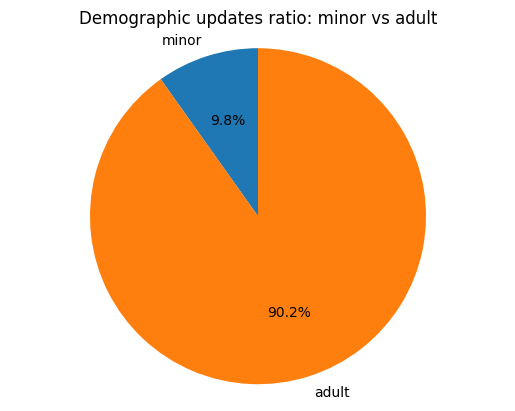

In [56]:
demo_updates = [3597737,32999820]
label = ['minor', 'adult']
plt.pie(demo_updates, labels=label,  autopct='%1.1f%%', startangle=90)
plt.title('Demographic updates ratio: minor vs adult')
plt.axis('equal')
plt.show()

In [57]:
demo_state_data[demo_state_data['total'] ==0]

,minor,adult,total
state,,,


# data standardization

In [58]:
# convert numbers into ratios 
demo_state_data['minor'] = round((demo_state_data['minor'] / demo_state_data['total'])*100,1)
demo_state_data['adult'] = round((demo_state_data['adult'] / demo_state_data['total'])*100,1)
demo_state_data

,minor,adult,total
state,,,
Andaman and Nicobar Islands,9.0,91.0,5228
Andhra Pradesh,13.9,86.1,1642143
Arunachal Pradesh,16.1,83.9,28391
Assam,8.3,91.7,755097
Bihar,7.9,92.1,3638845
Chandigarh,15.4,84.6,57395
Chhattisgarh,8.3,91.7,1421369
Dadra and Nagar Haveli and Daman and Diu,15.6,84.4,9203
Delhi,12.2,87.8,969666


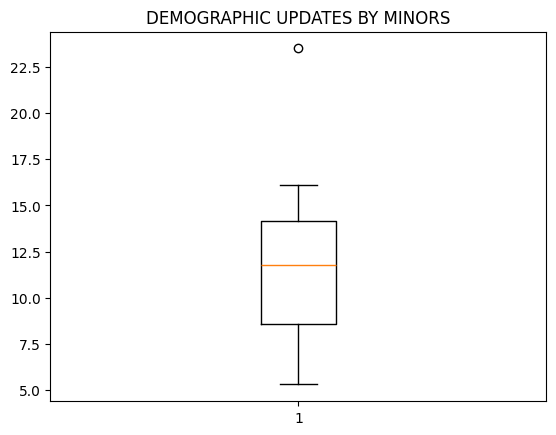

In [59]:
# box plot to find outliers 
plt.boxplot(demo_state_data['minor'])
plt.title('DEMOGRAPHIC UPDATES BY MINORS')
plt.show()

In [60]:
demo_state_data[demo_state_data['minor']>22.5]

,minor,adult,total
state,,,
Ladakh,23.5,76.5,4476


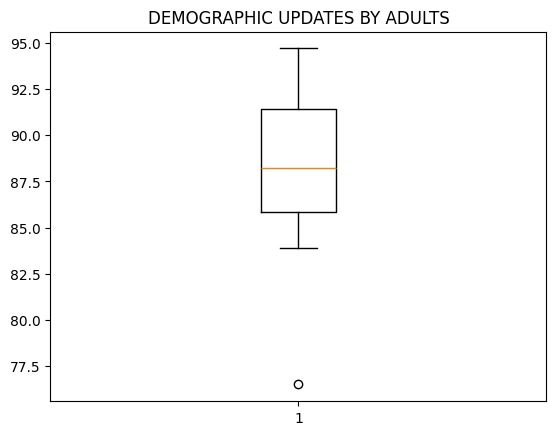

In [61]:
# box plot to find outliers 
plt.boxplot(demo_state_data['adult'])
plt.title('DEMOGRAPHIC UPDATES BY ADULTS')
plt.show()

In [62]:
demo_state_data[demo_state_data['adult'] < 77.5]

,minor,adult,total
state,,,
Ladakh,23.5,76.5,4476


In [63]:
# calculate national avg 
national_avg  = round(demo_state_data[['minor','adult', 'total']].mean(), 1)

In [64]:
demo_state_data.loc['national_avg'] = national_avg
demo_state_data.tail()

,minor,adult,total
state,,,
Tripura,8.7,91.3,104583.0
Uttar Pradesh,9.3,90.7,6460511.0
Uttarakhand,10.7,89.3,337421.0
West Bengal,6.2,93.8,2844348.0
national_avg,11.6,88.4,1016598.8


In [65]:
# select random states to compare with national average 
subset_data = demo_state_data.loc[['Arunachal Pradesh','Punjab', 'Karnataka', 'Ladakh','Meghalaya', 'national_avg']]
subset_data.drop('total', axis = 1, inplace = True)

In [66]:
subset_data

,minor,adult
state,,
Arunachal Pradesh,16.1,83.9
Punjab,6.4,93.6
Karnataka,15.6,84.4
Ladakh,23.5,76.5
Meghalaya,9.7,90.3
national_avg,11.6,88.4


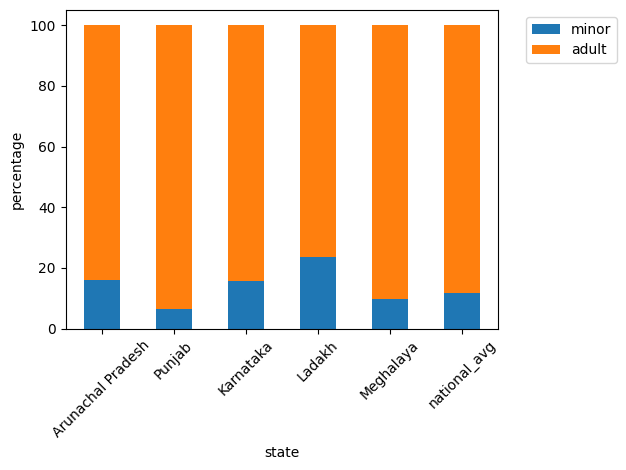

In [67]:
subset_data.plot( kind = 'bar' , stacked = True , mark_right=True , ylabel = 'percentage')
plt.xticks(rotation = 45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

In [68]:
demo_state_data.drop('total', axis = 1 , inplace = True)

<Figure size 1000x1300 with 0 Axes>

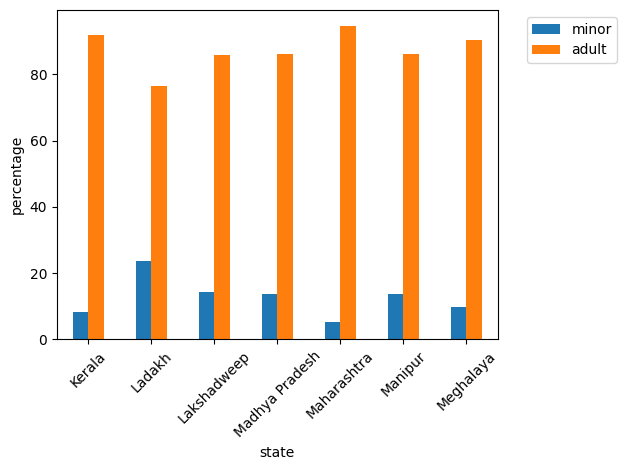

In [69]:
plt.figure(figsize = (10,13))
demo_state_data.iloc[16:23].plot( kind = 'bar', mark_right=True , ylabel = 'percentage')
plt.xticks(rotation = 45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

In [70]:
print(f'state with maximum demographic update ratio in minors :{demo_state_data['minor'].nlargest(1)} ')
print()
print(f'state with minimum demographic update ratio in adults :{demo_state_data['adult'].nsmallest(1)} ')

state with maximum demographic update ratio in minors :state
Ladakh    23.5
Name: minor, dtype: float64 

state with minimum demographic update ratio in adults :state
Ladakh    76.5
Name: adult, dtype: float64 


In [71]:
print(f'state with maximum demographic update ratio in adults :{demo_state_data['adult'].nlargest(1)} ')
print()
print(f'state with minimum demographic update ratio in minors :{demo_state_data['minor'].nsmallest(1)} ')

state with maximum demographic update ratio in adults :state
Maharashtra    94.7
Name: adult, dtype: float64 

state with minimum demographic update ratio in minors :state
Maharashtra    5.3
Name: minor, dtype: float64 


In [72]:
outlier_state = demo_state_data.loc[['Ladakh', 'Maharashtra', 'national_avg']]
outlier_state

,minor,adult
state,,
Ladakh,23.5,76.5
Maharashtra,5.3,94.7
national_avg,11.6,88.4


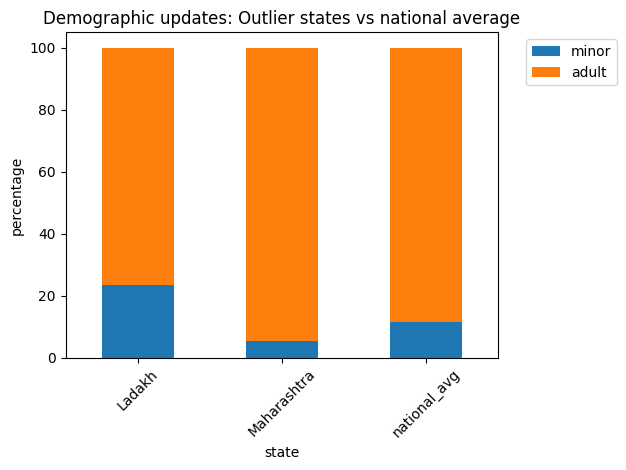

In [73]:
outlier_state.plot( kind = 'bar' , stacked = True , mark_right=True , ylabel = 'percentage')
plt.title('Demographic updates: Outlier states vs national average')
plt.xticks(rotation = 45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()